# ANN

Importing libraries

In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings("ignore")

I used the orignal Mnist dataset since it was the most famous dataset for digit detection. \
Gwtting the training and testing sets from the mnist dataset.

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


so we have 60,000 pics in training and 10,000 pics in testing

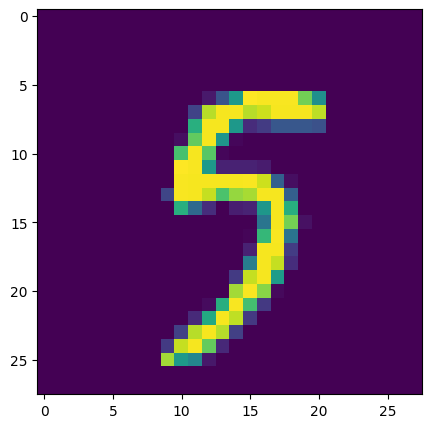

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[420])

Just schecking how the data is

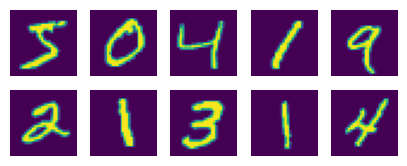

In [42]:
plt.figure(figsize=(5, 5))
for i in range(0, 10):
  ax = plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i])
  plt.axis("off")

Doing 1 hot encoding

In [43]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Reshaping the dataset

In [44]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # Here, 1 indicates the number of channels. Since the images in the dataset we are working with are in black and white, we specified the number of channels as 1 here.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) # Here, 1 indicates the number of channels. Since the images in the dataset we are working with are in black and white, we specified the number of channels as 1 here.

now checking shape after reshaping

In [45]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


We divide by 255 to standerdize data (as it runs faster). \
Also, we the the values between 0 and 1

In [46]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Building ANN \
Input layer \
2 hidden layers with relu\
and output layer with softmax

In [47]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), # Making the data understandable to the neural network
    Dense(units=128, activation="relu", name="layer1"), # Hidden layer
    Dense(units=64, activation="relu", name="layer2"),
    Dense(units=10, activation="softmax", name="output_layer")])  # Output Layer

model.compile(loss="categorical_crossentropy", # Error evaluation metric, the objective is to minimize this function
              optimizer="adam", # Optimization algorithm to minimize the loss function
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]) # Evaluation metrics

In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

traning on 16 epochs \
(also tried 50 epochs but result did not change much)

In [49]:
history = model.fit(X_train, # Dependent Variable
                    y_train, # Independent Variable
                    epochs=16, # Number of iterations
                    batch_size=128, # Number of neurons to be optimized
                    validation_data=(X_test, y_test)) # Test data set

Epoch 1/16
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8345 - loss: 0.5887 - precision_2: 0.9308 - recall_2: 0.7222 - val_accuracy: 0.9508 - val_loss: 0.1722 - val_precision_2: 0.9623 - val_recall_2: 0.9425
Epoch 2/16
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.1487 - precision_2: 0.9653 - recall_2: 0.9484 - val_accuracy: 0.9669 - val_loss: 0.1158 - val_precision_2: 0.9728 - val_recall_2: 0.9619
Epoch 3/16
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9707 - loss: 0.0986 - precision_2: 0.9760 - recall_2: 0.9656 - val_accuracy: 0.9690 - val_loss: 0.0991 - val_precision_2: 0.9751 - val_recall_2: 0.9662
Epoch 4/16
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0731 - precision_2: 0.9816 - recall_2: 0.9748 - val_accuracy: 0.9742 - val_loss: 0.0850 - val_precision_2: 0.9782 - val_recall_2: 0.9708
Epoch 5/16
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0553 - precision_2: 0.9859 - recall_2: 0.9804 -

plotting accuracy and loss

Text(0.5, 1.0, 'Training and Test Loss Graph')

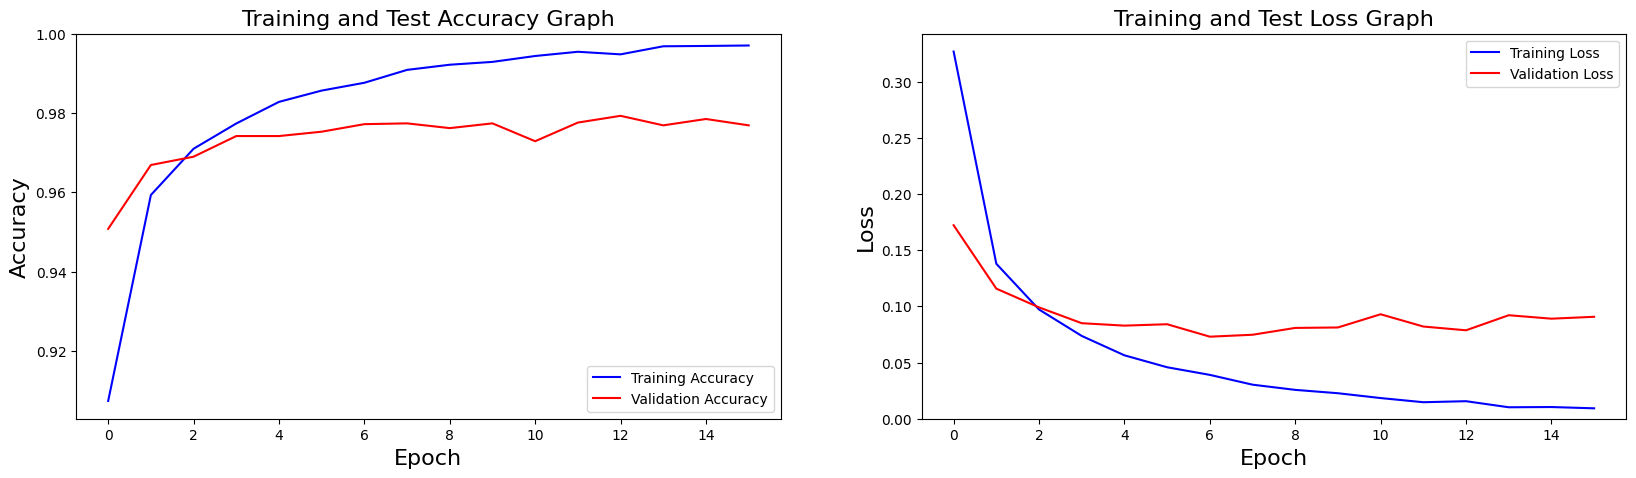

In [50]:
# Accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracy Graph", fontsize=16)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)

In [51]:
loss, precision, recall, acc = model.evaluate(X_test, y_test, verbose=False)

print(f"Test Accuracy: {round(acc * 100, 2)}")
print(f"Test Loss: {round(loss * 100, 2)}")
print(f"Test Precision: {round(precision * 100, 2)}")
print(f"Test Recall: {round(recall * 100, 2)}")

Test Accuracy: 97.69
Test Loss: 9.07
Test Precision: 97.77
Test Recall: 97.61


Checking the working:

In [53]:
model.save("model.keras")

In [55]:
import random

random = random.randint(0, X_test.shape[0])
random

7559

In [56]:
test_image = X_test[random]

In [57]:
y_test[random]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

that means random number is 5

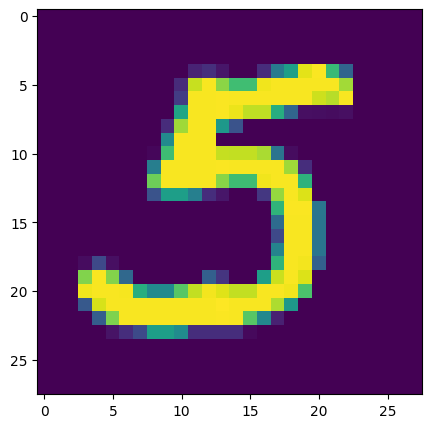

In [58]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28, 28))

checking the probability of all the digits

In [59]:
test_data = X_test[random].reshape(1, 28, 28, 1)

In [60]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [61]:
predicted_classes = np.argmax(probability)

In [62]:
print(f"Predicted Class: {predicted_classes}\nProbability Value of Predicted Class: {np.max(probability, axis = -1)[0]}\nProbability Values of Other Classes: {probability}")

Predicted Class: 5
Probability Value of Predicted Class: 0.9999988079071045
Probability Values of Other Classes: [[1.6632533e-17 9.9875603e-16 2.7246117e-15 1.2216083e-06 1.1887300e-21
  9.9999881e-01 2.5220148e-17 2.0058074e-17 3.8301654e-11 1.0744843e-08]]
